In [56]:
import os
import pandas as pd
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import urllib
import os
from PIL import Image
import requests
from io import BytesIO
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input



model = VGG16(weights='imagenet', include_top=False)
genres_df=pd.read_csv('data/genres.csv').set_index("movie")
genres_mat = np.matrix(genres_df.reset_index(drop=True))

poster_ids = []
poster_data = []
posters_dir = 'posters/'
dim= (224,224)
channels=3

for movie, row in genres_df.iterrows():
    img_path = '{}/{}.jpg'.format(posters_dir, movie)
    img = image.load_img(img_path, target_size=dim, color_mode='rgb')
    x = image.img_to_array(img)
    poster_data.append(x)
    poster_ids.append(movie)

poster_data = np.array(poster_data)

poster_data.shape
genres_mat.shape

genres_df.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
movie,,,,,,,,,,,,,,,,,,,
418945f8-44ad-4ff4-a20c-098018973880,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
0372203a-5fa2-46de-96be-7422be17cb9f,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
f6feeaa9-c0a3-40ea-a367-6b83cf8a0efc,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
e425bb23-47d2-455b-87c0-2f8e9bcdafd3,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
3e399eca-dfe6-4143-b3ea-723bcb22842e,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


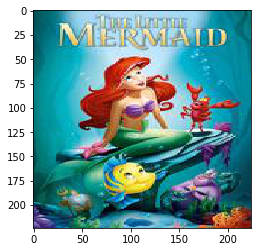

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(poster_data[25]/255.)


train_data = poster_data[100:]
test_data = poster_data[0:100]

train_genres = genres_mat[100:]
test_genres = genres_mat[0:100]

x_train = train_data.astype('float32') / 255.
x_test = test_data.astype('float32') / 255.



In [40]:
i=0
feature_list=[]

for poster in poster_data:
    #print(poster)
   
    img_numpy=poster
    img_data = np.expand_dims(img_numpy, axis=0)
    img_data = preprocess_input(img_data)
        
    vgg16_feature = model.predict(img_data)
    vgg16_feature_np = np.array(vgg16_feature)
  
    features=vgg16_feature_np.flatten()
    feature_list.append(features)
        
    if(i%50==0):
        print("Working on poster",i)
    
    i=i+1


Working on poster 0
Working on poster 50
Working on poster 100
Working on poster 150
Working on poster 200
Working on poster 250
Working on poster 300
Working on poster 350
Working on poster 400
Working on poster 450
Working on poster 500
Working on poster 550
Working on poster 600
Working on poster 650
Working on poster 700
Working on poster 750
Working on poster 800
Working on poster 850
Working on poster 900
Working on poster 950
Working on poster 1000


In [51]:
genres=np.array(genres_mat)
features= np.stack(feature_list)

from sklearn.model_selection import train_test_split
features_train,features_test,genres_train,genres_test =train_test_split(features,genres, test_size=0.25, random_state=42)
input_shape=  features_train.shape[1]
output_shape= genres_train.shape[1]

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
final_nn = Sequential([
    Dense(1024, input_shape=(input_shape,)),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(output_shape),
    Activation('sigmoid'),
])
opt = optimizers.rmsprop(lr=0.0001, decay=1e-6)

#sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.4, nesterov=False)
final_nn.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
final_nn.fit(features_train,genres_train,epochs=10, batch_size=32,verbose=1)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
771/771 [==============================] - 11s 14ms/step - loss: 1.8649 - acc: 0.8107
Epoch 2/10
771/771 [==============================] - 10s 13ms/step - loss: 0.6888 - acc: 0.8974
Epoch 3/10
771/771 [==============================] - 10s 13ms/step - loss: 0.2376 - acc: 0.9640
Epoch 4/10
771/771 [==============================] - 10s 13ms/step - loss: 0.1399 - acc: 0.9820
Epoch 5/10
771/771 [==============================] - 10s 13ms/step - loss: 0.1141 - acc: 0.9867
Epoch 6/10
771/771 [==============================] - 10s 13ms/step - loss: 0.1106 - acc: 0.9881
Epoch 7/10
771/771 [==============================] - 9s 12ms/step - loss: 0.1015 - acc: 0.9898
Epoch 8/10
771/771 [==============================] - 9s 12ms/step - loss: 0.1177 - acc: 0.9886
Epoch 9/10
771/771 [==============================] - 10s 13ms/step - loss: 0.0951 - acc: 0.9915
Epoch 10/10
771/771 [==============================] - 10s 12ms/step - loss: 0.09

0.088409424
15


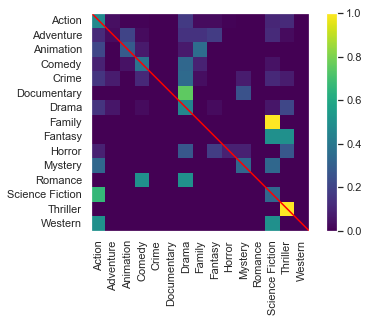

In [176]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

genres_pred_train=final_nn.predict(features_train)
genres_pred = final_nn.predict(features_test)
print(np.mean(genres_pred))
matrix = confusion_matrix(genres_test.argmax(axis=1), genres_pred.argmax(axis=1))
matrix2 = confusion_matrix(genres_train.argmax(axis=1),genres_pred_train.argmax(axis=1))

index=list(set(genres_test.argmax(axis=1)))
print(len(index))
genres=genres_df.columns[index]
data=pd.DataFrame(matrix)

cm = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.imshow(data, vmax=10,cmap='viridis')
plt.xticks([])
plt.imshow(cm,cmap='viridis')
plt.colorbar()
plt.yticks(np.arange(len(genres)), labels=genres)
plt.xticks(np.arange(len(genres)), labels=genres,rotation='vertical')
plt.grid(b=None)
plt.plot([-0.5+0,14.5],[-.5,14.5], color="red")
plt.savefig('genre_classification.png', dpi=200)

In [158]:

list(genres)

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Horror',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'Western']